In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

data_raw = pd.read_csv('/home/marcel/catkin_ws/src/dynamic-model-car-simulator/data.csv')
data = pd.DataFrame(data=data_raw)
data[250:300]
#plt.plot(data['x'], data['t'])

#print('experiment end time: ' + repr(np.max(data['t'])) + 's')



,x,y,t,torque,steering_angle,long_vel,lat_vel,yaw_angle,yaw_rate,slip_angle_f,slip_angle_r,norm_load_f,norm_load_r,slip_angle_est_f,slip_angle_est_r,lat_for_f,lat_for_r
250,0.124097,0,2.50,0,0.57,0.0516,0,0,0,0.0,0,6338.75,6338.75,0,0.0,0.0,0.0
251,0.124613,0,2.51,0,0.57,0.0516,0,0,0,0.0,0,6338.75,6338.75,0,0.0,0.0,0.0
252,0.125129,0,2.52,0,0.57,0.0516,0,0,0,0.0,0,6338.75,6338.75,0,0.0,0.0,0.0
253,0.125645,0,2.53,0,0.57,0.0516,0,0,0,0.0,0,6338.75,6338.75,0,0.0,0.0,0.0
254,0.126161,0,2.54,0,0.57,0.0516,0,0,0,0.0,0,6338.75,6338.75,0,0.0,0.0,0.0
255,0.126677,0,2.55,0,0.57,0.0516,0,0,0,0.0,0,6338.75,6338.75,0,0.0,0.0,0.0
256,0.127193,0,2.56,0,0.57,0.0516,0,0,0,0.0,0,6338.75,6338.75,0,0.0,0.0,0.0
257,0.127709,0,2.57,0,0.57,0.0516,0,0,0,0.0,0,6338.75,6338.75,0,0.0,0.0,0.0
258,0.128225,0,2.58,0,0.57,0.0516,0,0,0,0.0,0,6338.75,6338.75,0,0.0,0.0,0.0
259,0.128741,0,2.59,0,0.57,0.0516,0,0,0,0.0,0,6338.75,6338.75,0,0.0,0.0,0.0


In [315]:
np.where(data['slip_angle_f'] == np.max(data['slip_angle_f']))

(array([0]),)

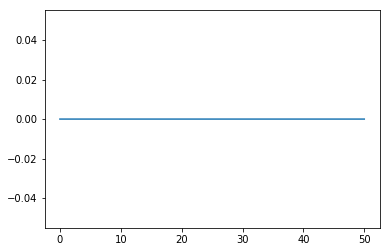

In [316]:
yaw_clean = np.unwrap(data['yaw_angle'])
plt.plot(data['t'], np.rad2deg(yaw_clean) %360)

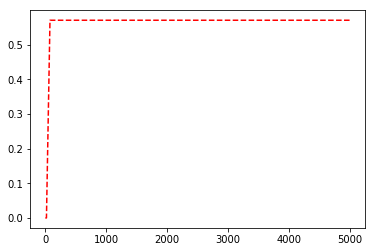

In [317]:
plt.plot(data['steering_angle'][:], '--r')

In [318]:
torque = data['torque']
torque_n = sum(torque == np.max(torque))
torque_change_time = data['t'][torque_n]
torque_change_time

0.2

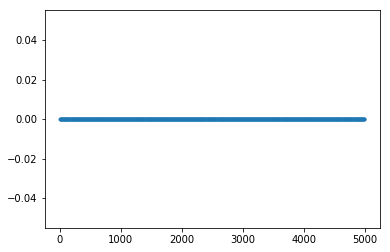

In [319]:
slip_angle = data['slip_angle_f']
plt.plot(slip_angle[::10], '.')

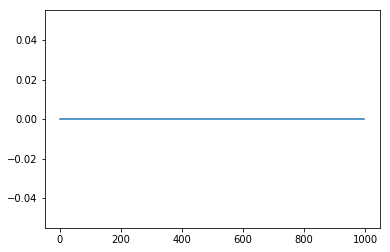

In [320]:
plt.plot(np.diff(slip_angle[1:1000]))


[]

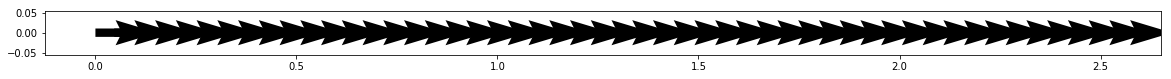

In [321]:
data_yaws = data['yaw_angle']
data_x = data['x']
data_y = data['y']

x = data_x[::100]
y = data_y[::100]
u = np.cos(data_yaws)[::100]
v = np.sin(data_yaws)[::100]
#u = data['long_vel'][::100]
#v = data['lat_vel'][::100]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.quiver(x,y, u,v)
plt.plot()

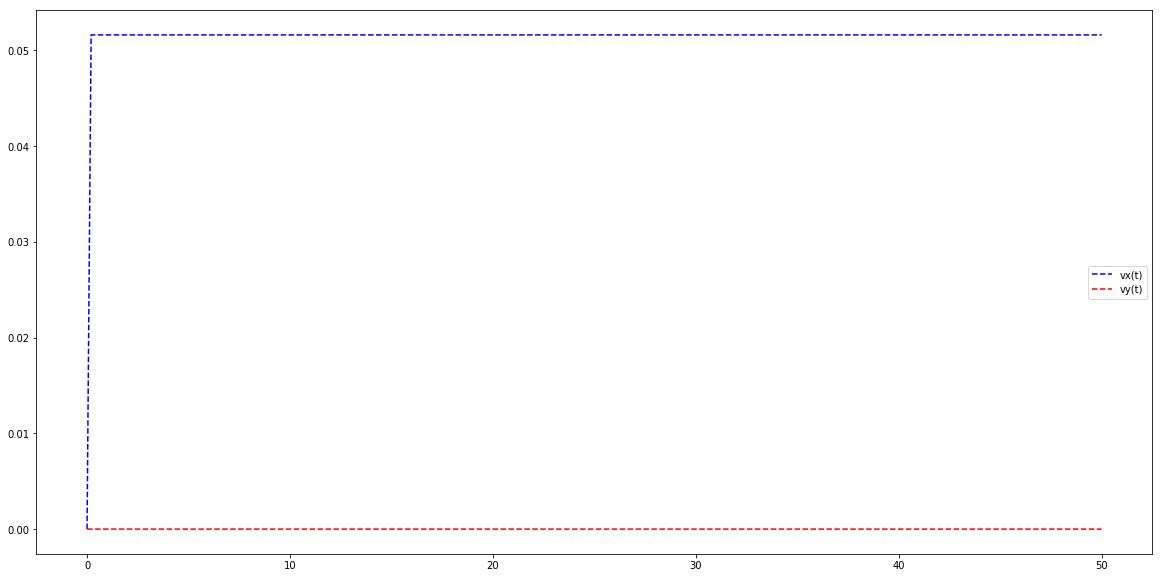

In [322]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'], data['long_vel'], '--b', label='vx(t)')
ax.plot(data['t'], data['lat_vel'], '--r', label='vy(t)')
leg = ax.legend();

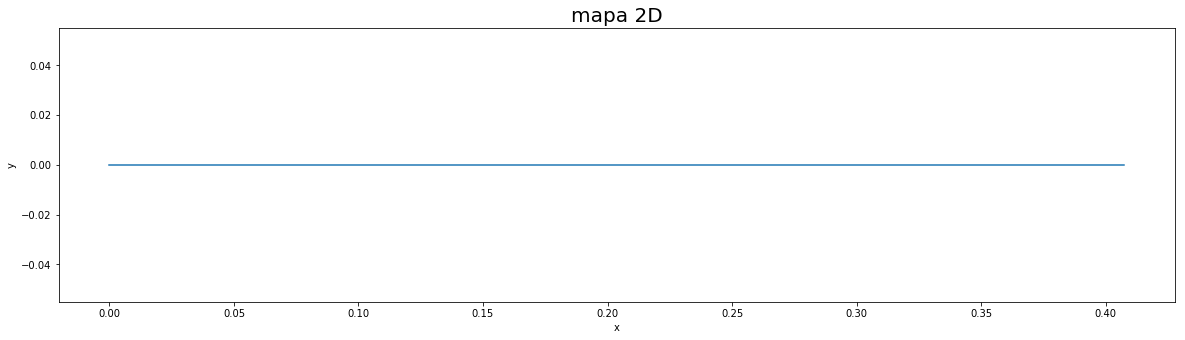

In [323]:


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.xlabel('x')
plt.ylabel('y')
plt.title('mapa 2D', fontsize=20)
#ax = plt.gca()
#ax.set_autoscale_on(False)

plt.plot(data['x'][:800], data['y'][:800])

Text(0.5, 1.0, 'x(t)')

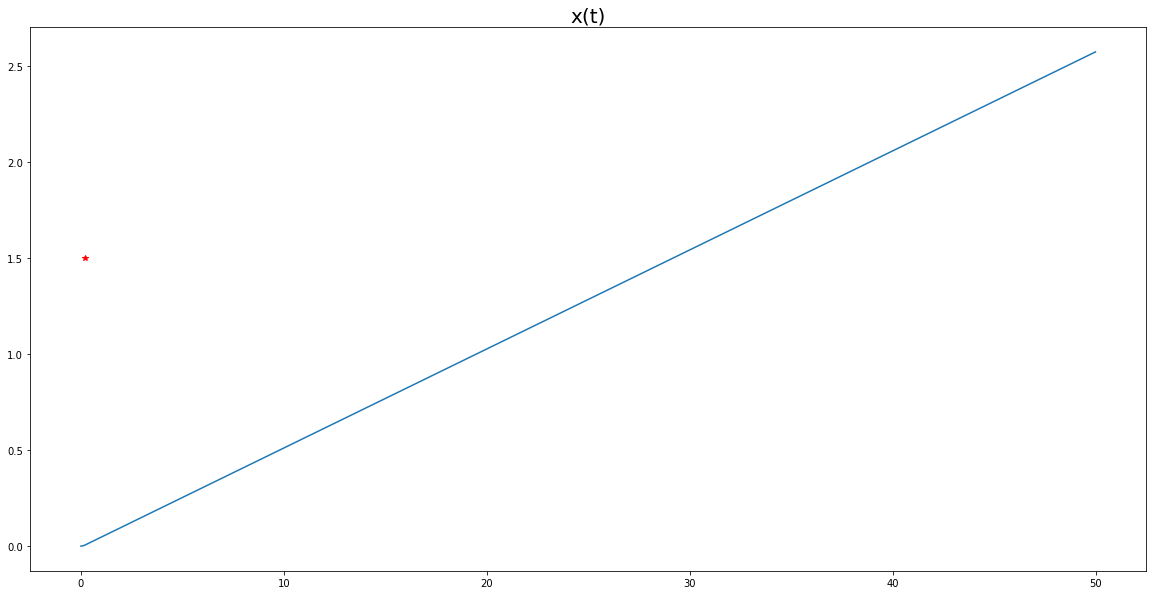

In [324]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['x'], torque_change_time, 1.5, 'r*')
plt.title('x(t)', fontsize=20)

Text(0.5, 1.0, 'y(t)')

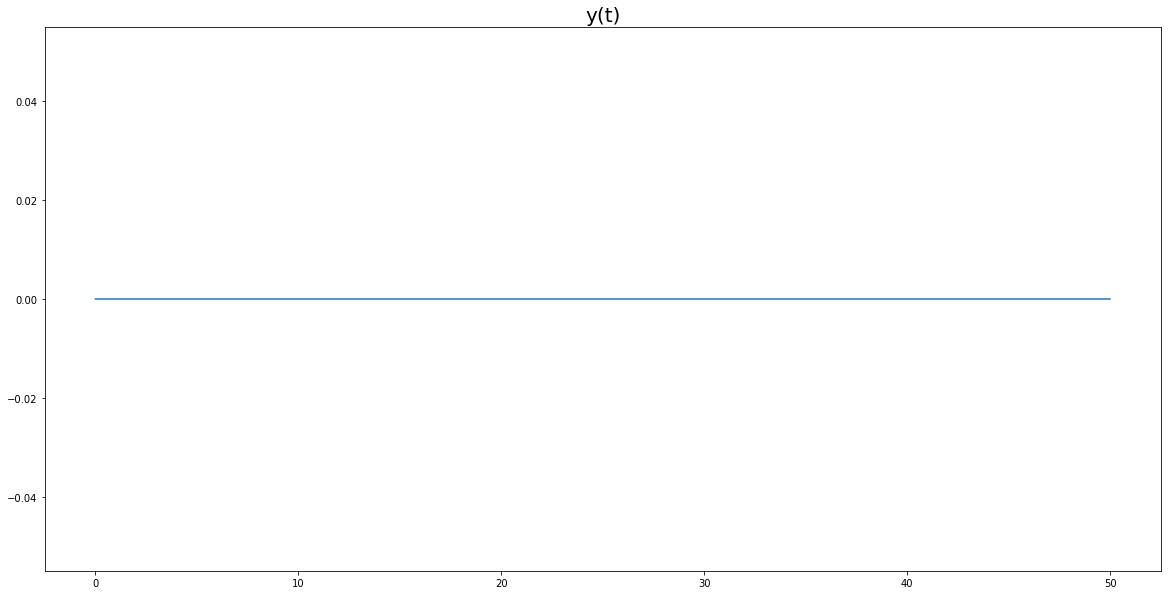

In [325]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['y'])
plt.title('y(t)', fontsize=20)

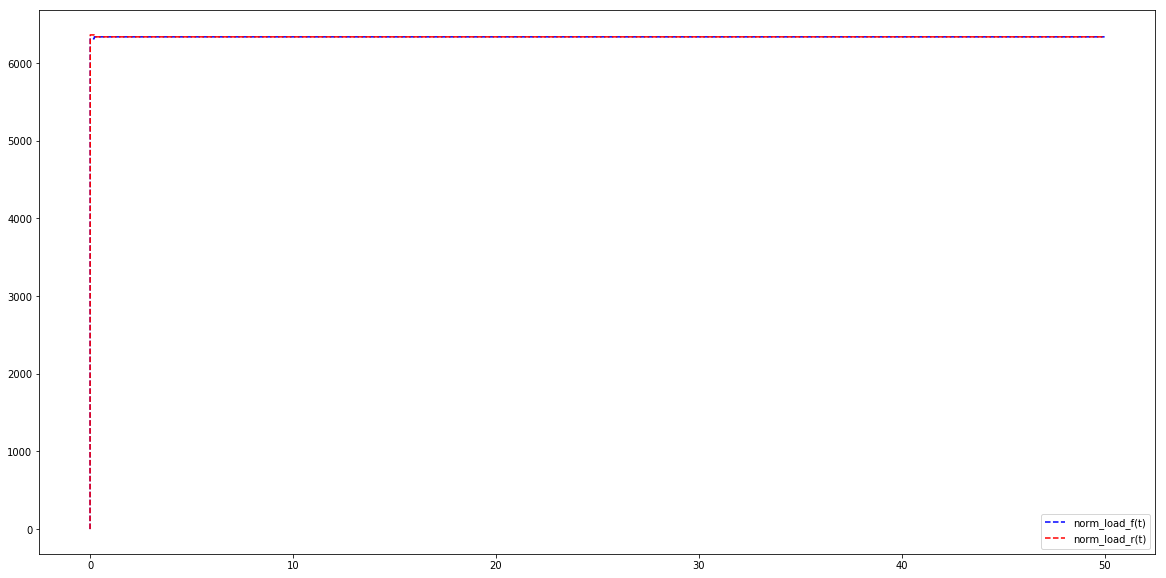

In [326]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'], data['norm_load_f'], '--b', label='norm_load_f(t)')
ax.plot(data['t'], data['norm_load_r'], '--r', label='norm_load_r(t)')
leg = ax.legend();